In [36]:
import pandas as pd

file_name = 'https://raw.githubusercontent.com/fnkzhang/ECS171FinalProject/main/adult.csv'
data = pd.read_csv(file_name);

In [37]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       '50k'],
      dtype='object')

In [38]:
# check for nan values
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
50k               0
dtype: int64

Here, we aim to encode any categorical features to better see any correlation between our features. 

A couple things to note:

1.) the column 'education_num' is already an encoded version of the categorical column 'education'

2.) the description for the column 'relationship' is as follows: *\"represents what this individual is relative to others.\"* Since this description is fairly vague as it doesnt give information as to who the "others" entail, we choose to ignore this feature on the basis of insufficient data.


In [39]:
# dropping relationshiip column
data.drop('relationship', axis=1, inplace=True)

In [40]:
# encoding categorical columns

In [41]:
from sklearn.preprocessing import LabelEncoder
# encoding workclass
workclass_encoder = LabelEncoder()
workclass_encoder.fit(data['workclass'])
workclass_values = workclass_encoder.transform(data['workclass'])

data["workclass_values"] = workclass_values

In [42]:
# encoding marital-status
ms_encoder = LabelEncoder()
ms_encoder.fit(data['marital-status'])
ms_values = ms_encoder.transform(data['marital-status'])

data["marital_values"] = ms_values

In [43]:
# encoding occupation
occupation_encoder = LabelEncoder()
occupation_encoder.fit(data['occupation'])
occupation_values = occupation_encoder.transform(data['occupation'])

data["occupation_values"] = occupation_values

In [44]:
# encoding race
race_encoder = LabelEncoder()
race_encoder.fit(data['race'])
race_values = race_encoder.transform(data['race'])

data["race_values"] = race_values

In [45]:
# encoding sex
sex_encoder = LabelEncoder()
sex_encoder.fit(data['sex'])
sex_values = sex_encoder.transform(data['sex'])

data["sex_values"] = sex_values

In [46]:
# encoding native-country
nc_encoder = LabelEncoder()
nc_encoder.fit(data['native-country'])
nc_values = nc_encoder.transform(data['native-country'])

data["country_values"] = nc_values

In [47]:
# encode 50k
income_encoder = LabelEncoder()
income_encoder.fit(data['50k'])
income_values = income_encoder.transform(data['50k'])

data["income_values"] = income_values

In [48]:
data.describe()

,age,fnlwgt,education_num,capital-gain,capital-loss,hours-per-week,workclass_values,marital_values,occupation_values,race_values,sex_values,country_values,income_values
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,3.868892,2.611836,6.572740,3.665858,0.669205,36.718866,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,1.455960,1.506222,4.228857,0.848806,0.470506,7.823782,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,4.000000,2.000000,3.000000,4.000000,0.000000,39.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,4.000000,2.000000,7.000000,4.000000,1.000000,39.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,4.000000,4.000000,10.000000,4.000000,1.000000,39.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,8.000000,6.000000,14.000000,4.000000,1.000000,41.000000,1.000000


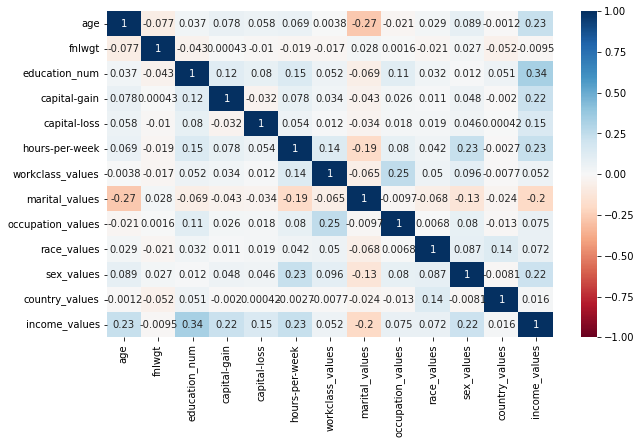

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
# Pearson correlation by default in pandas
corr = data.corr()

# Let's use Seaborn to do the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')

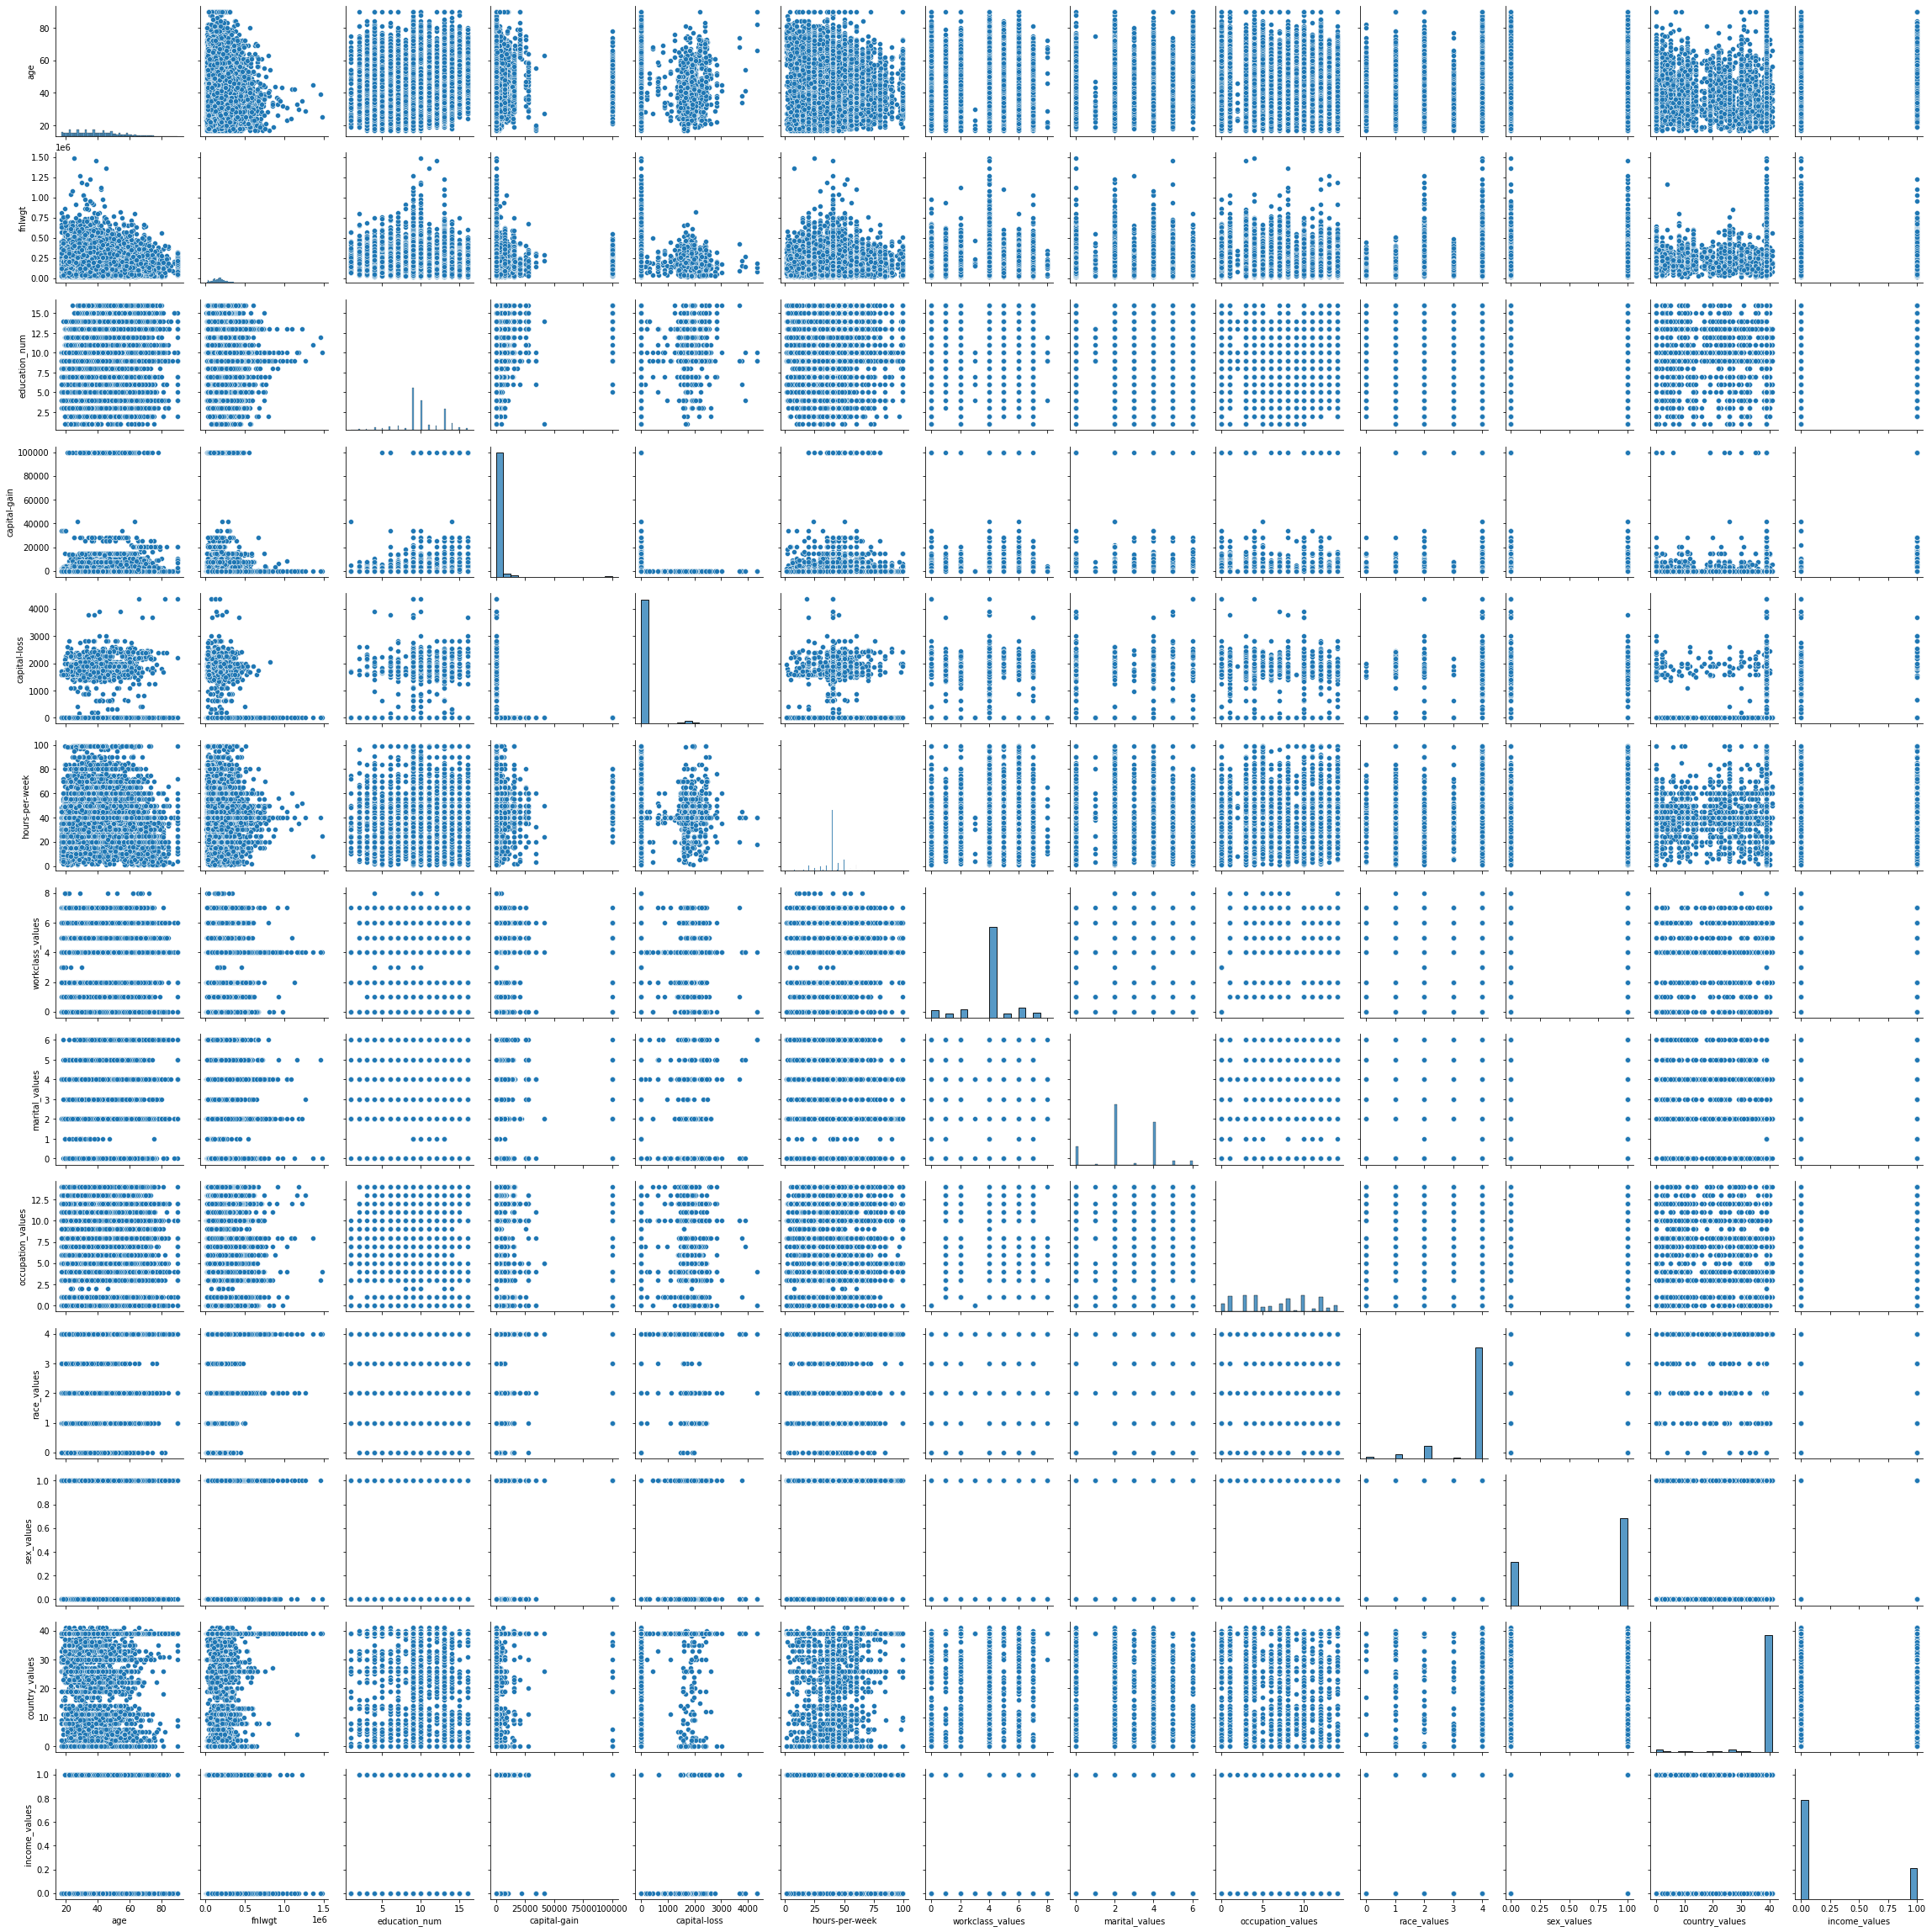

In [50]:
import seaborn as sns

# generating pairplot
sns.pairplot(data)

Qe can see from the pair plot that there dont seem to be any apparent correlation between the features. As a result, we will continue analyzing the features further as relatively independent features. 

At this point, we will try to process the data values to simplify and remove insignificant features from our dataset.

In [51]:
# determining the encoding values for education levels
print(data["education"].value_counts())
print(data["education_num"].value_counts())

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education_num, dtype: int64


In [52]:
# couunting values for all those with non-hs passed education levels
print((data['education_num'] <= 8).sum())
data[data['education_num'] <= 8].income_values.value_counts()


4253


0    4009
1     244
Name: income_values, dtype: int64

In [53]:
# combine non-hs graduates (12th, 11th, 10th, 9th, 7th-8th, 5th-6th, 1rst-4th, Preschool) into one column
edu_generalized = pd.Series(data['education_num'].values)

edu_generalized[edu_generalized <= 8] = 8
print(edu_generalized.value_counts())
data['edu_generalized'] = edu_generalized
# dropping the duplicate and more intricate education_num column
data.drop('education_num', axis=1, inplace=True)

9     10501
10     7291
13     5355
8      4253
14     1723
11     1382
12     1067
15      576
16      413
dtype: int64


In [54]:
# adjust any ranges and/or standard deviations to give all values equal weightage

In [55]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'race', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', '50k', 'workclass_values',
       'marital_values', 'occupation_values', 'race_values', 'sex_values',
       'country_values', 'income_values', 'edu_generalized'],
      dtype='object')

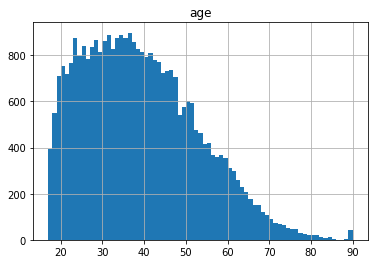

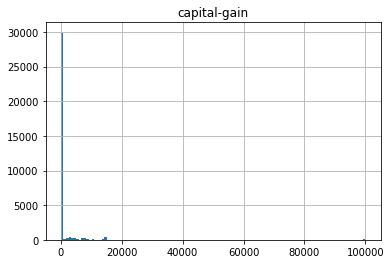

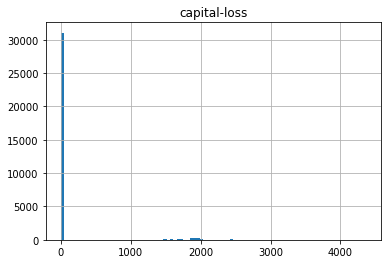

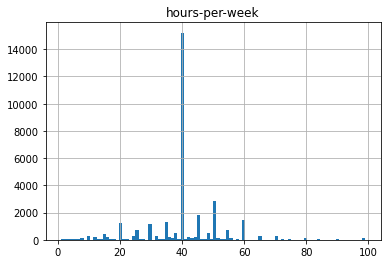

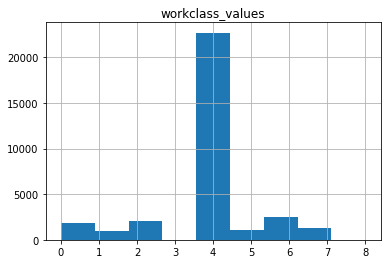

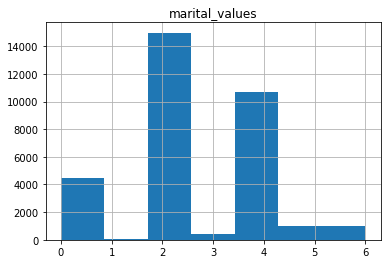

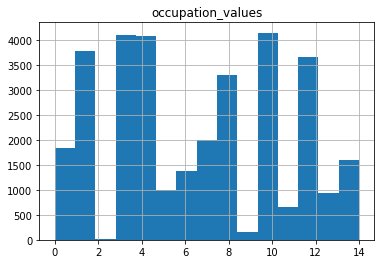

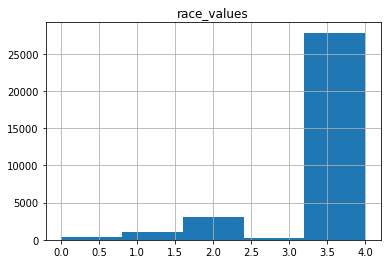

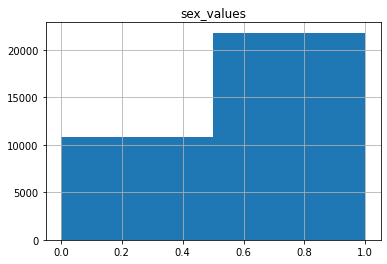

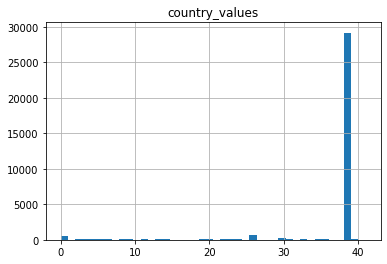

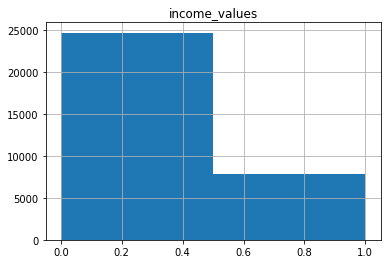

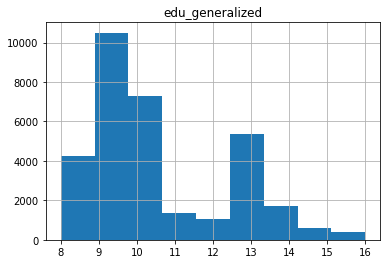

In [56]:
df = data.drop(labels=['workclass', 'fnlwgt','education','marital-status','occupation','race','sex','native-country','50k'], axis=1)
df
for i in df.columns:
  df.hist(column=i, bins=len(df[i].unique()));


We can see, that 

1.) age, capital-gain, capital-loss, marital values, edu_generalized is skewed left

2.) race_values, sex_values, country_values, are skewed right

3.) hours-per-week, workclass is fairly normally distributed

4.) occupation_values have no apparent trend

In [57]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'race', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', '50k', 'workclass_values',
       'marital_values', 'occupation_values', 'race_values', 'sex_values',
       'country_values', 'income_values', 'edu_generalized'],
      dtype='object')

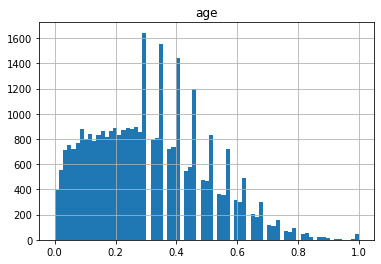

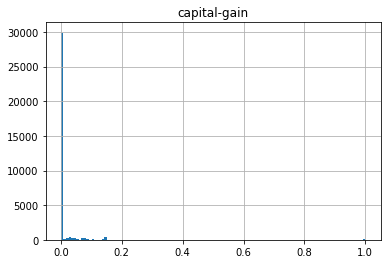

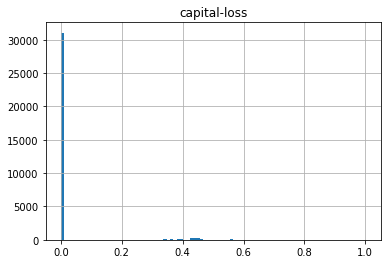

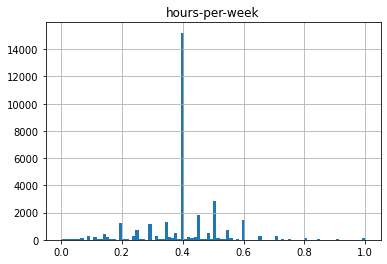

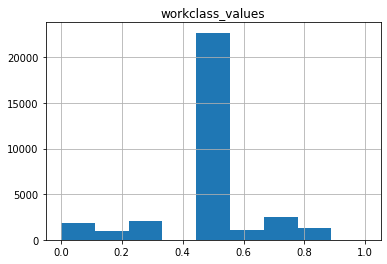

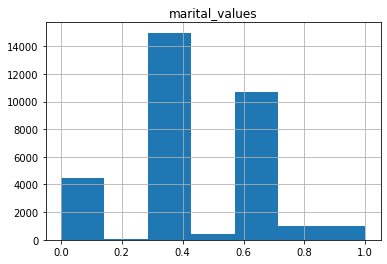

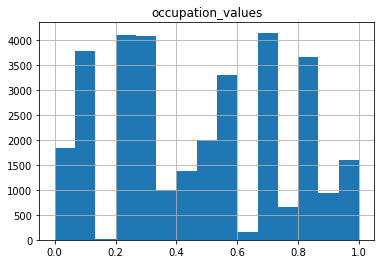

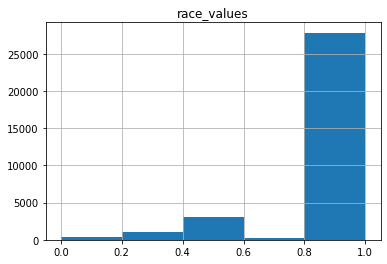

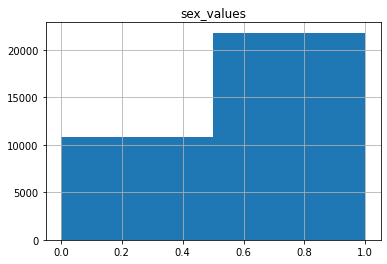

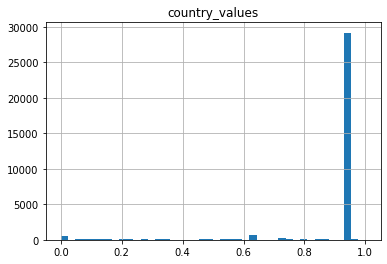

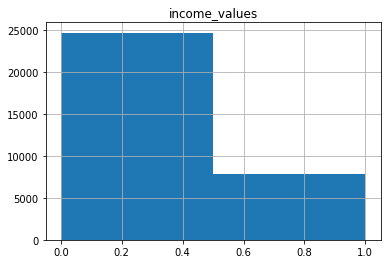

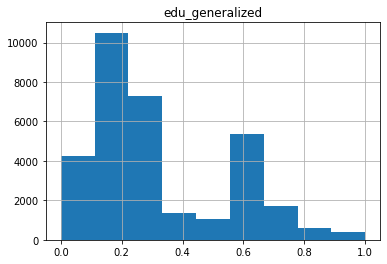

In [58]:
# normalize all data
from sklearn.preprocessing import MinMaxScaler

for i in df.columns:
  # build the scaler model
  scaler = MinMaxScaler()
  # fit using the train set
  scaler.fit(df[i].values.reshape(-1, 1))
  # transform the test test
  X_scaled = pd.Series(scaler.transform(df[i].values.reshape(-1, 1)).flat)
  
  df[i] = X_scaled
  df.hist(column=i, bins=len(df[i].unique()));

In [59]:
# standardize all numerical data
from scipy.stats import zscore
df = df.apply(zscore)

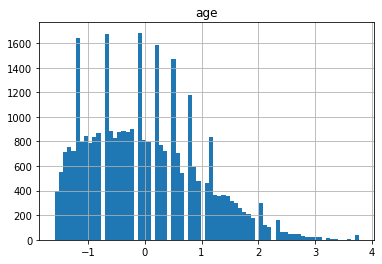

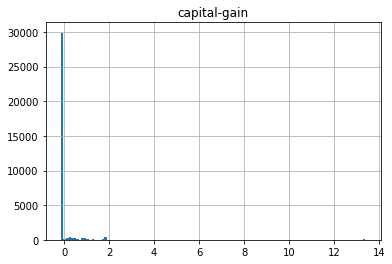

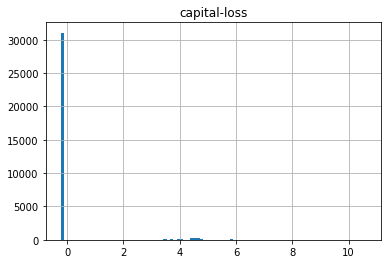

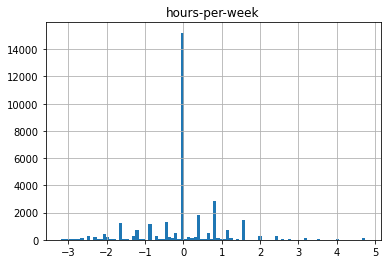

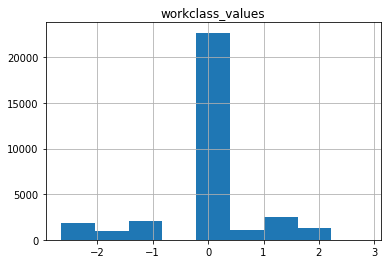

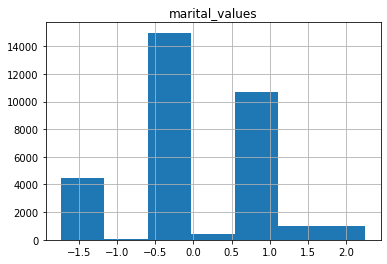

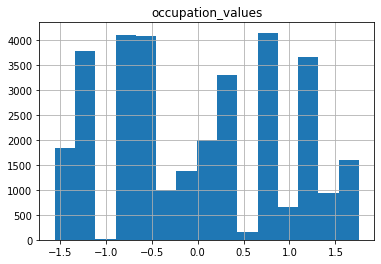

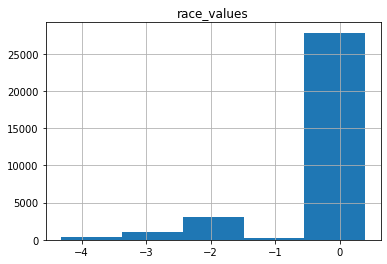

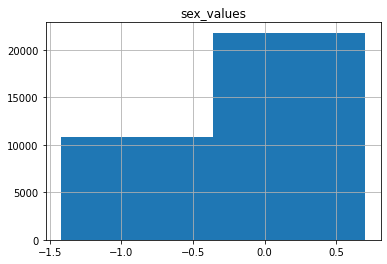

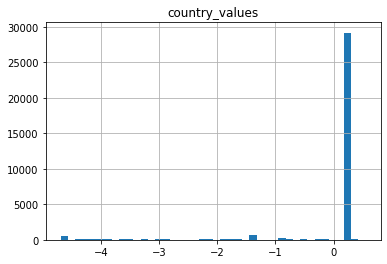

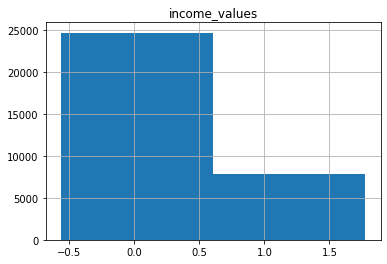

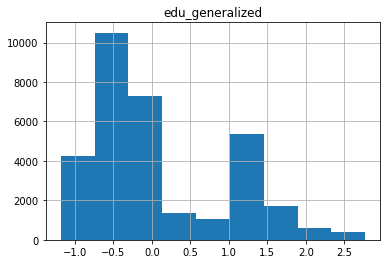

In [60]:
# Verifying standardization
for i in df.columns:
  df.hist(column=i, bins=len(df[i].unique()));

In [61]:
# Verifying standardizaton (mean == 0 && std == 1)
df.describe()

,age,capital-gain,capital-loss,hours-per-week,workclass_values,marital_values,occupation_values,race_values,sex_values,country_values,income_values,edu_generalized
count,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04
mean,-1.326771e-16,-8.292320e-18,-6.568391e-17,-6.142864e-16,1.276581e-16,-5.706426e-17,5.575494e-17,-1.963971e-16,-7.921348e-17,1.942149e-16,1.833039e-17,1.403148e-16
std,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,-1.582206e+00,-1.459205e-01,-2.166595e-01,-3.194030e+00,-2.657320e+00,-1.734058e+00,-1.554283e+00,-4.318909e+00,-1.422331e+00,-4.693310e+00,-5.631985e-01,-1.183819e+00
25%,-7.757679e-01,-1.459205e-01,-2.166595e-01,-3.542945e-02,9.005041e-02,-4.062122e-01,-8.448608e-01,3.936675e-01,-1.422331e+00,2.915686e-01,-5.631985e-01,-6.892928e-01
50%,-1.159546e-01,-1.459205e-01,-2.166595e-01,-3.542945e-02,9.005041e-02,-4.062122e-01,1.010359e-01,3.936675e-01,7.030713e-01,2.915686e-01,-5.631985e-01,-1.947668e-01
75%,6.904838e-01,-1.459205e-01,-2.166595e-01,3.695194e-01,9.005041e-02,9.216339e-01,8.104583e-01,3.936675e-01,7.030713e-01,2.915686e-01,-5.631985e-01,7.942853e-01
max,3.769612e+00,1.339458e+01,1.059351e+01,4.742967e+00,2.837421e+00,2.249480e+00,1.756355e+00,3.936675e-01,7.030713e-01,5.472033e-01,1.775573e+00,2.772389e+00


In [62]:
# replacing numeric columns in data from those in df
print(data.shape)
for i in df.columns:
  data[i] = df[i]
print(data.shape) 

(32561, 21)
(32561, 21)


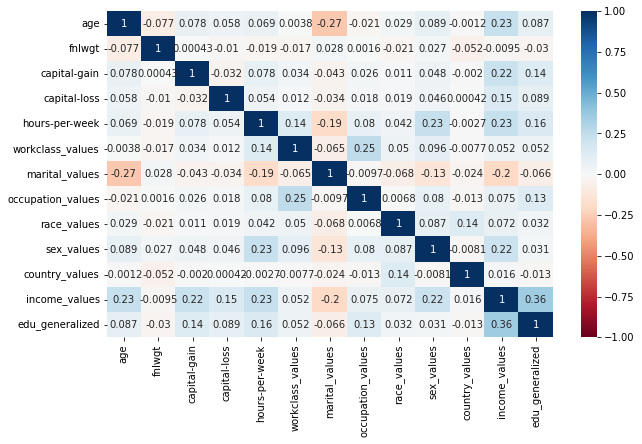

In [63]:
# Pearson correlation by default in pandas
corr2 = data.corr()

# Let's use Seaborn to do the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr2, vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')

From the numerical values, we can see that 'edu_generalized', 'sex_values', 'marital_values', 'hours-per-week', 'capital-loss', ''capital-gain', and 'age' are all values that are resulting in a correlation of greater than or equal to an effect of 0.2 (ie. +- 0.2). 

One-hot encoded heatmaps for each category (on original dataset)

AxesSubplot(0.125,0.125;0.62x0.755)
AxesSubplot(0.125,0.125;0.62x0.755)
AxesSubplot(0.125,0.125;0.62x0.755)
AxesSubplot(0.125,0.125;0.62x0.755)
AxesSubplot(0.125,0.125;0.62x0.755)
AxesSubplot(0.125,0.125;0.62x0.755)


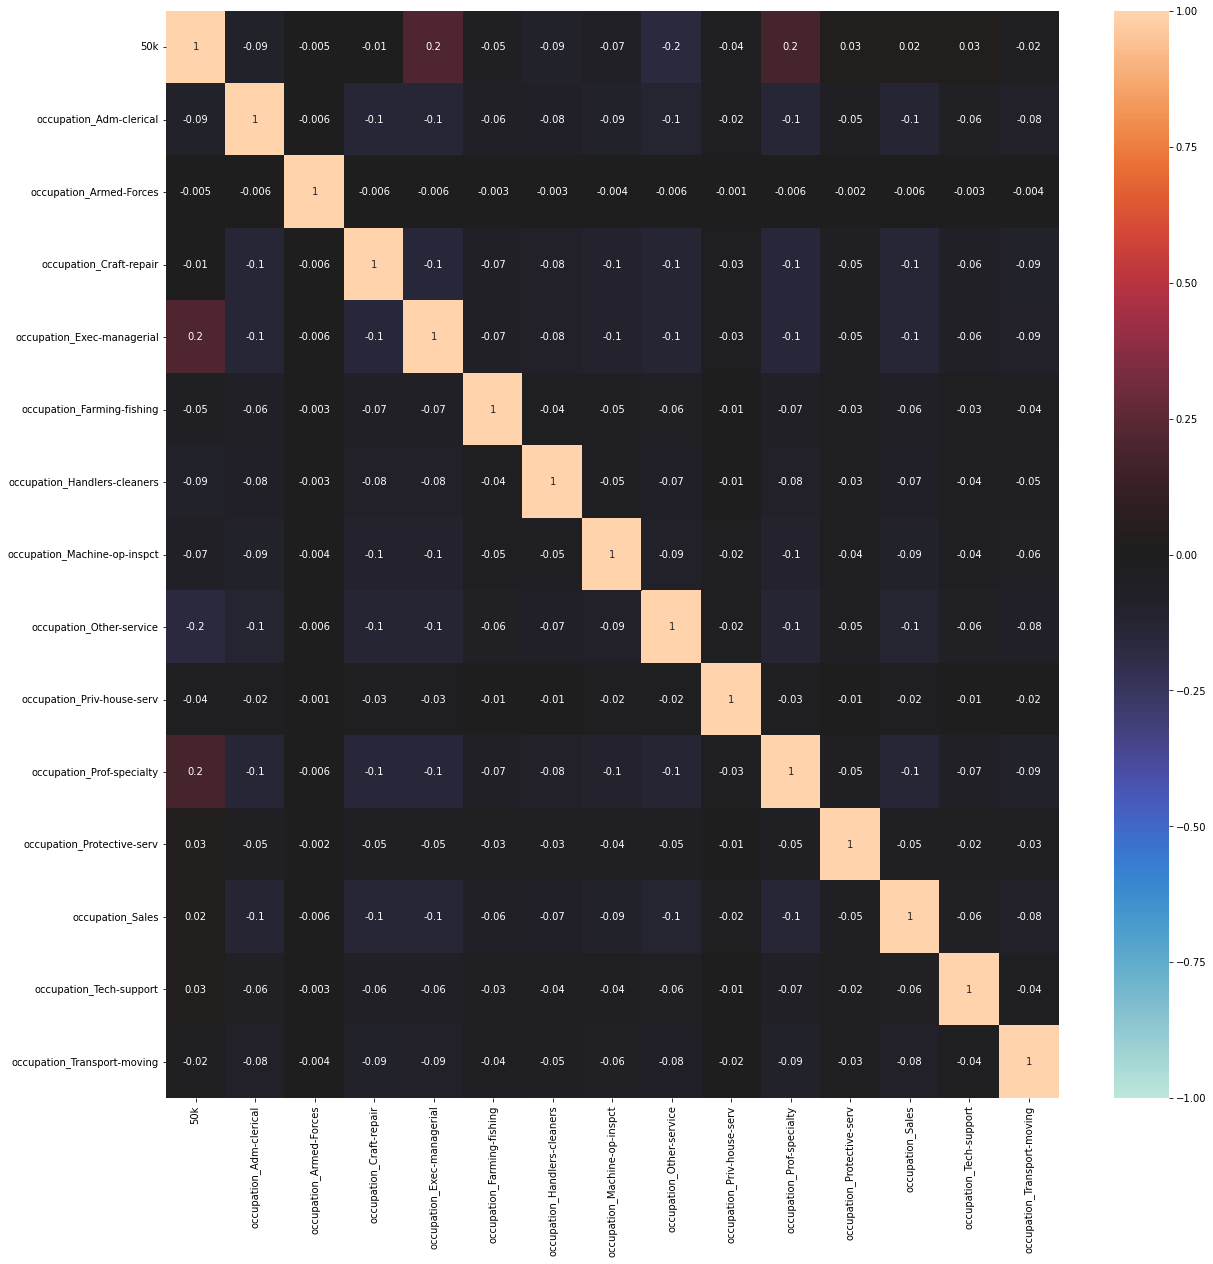

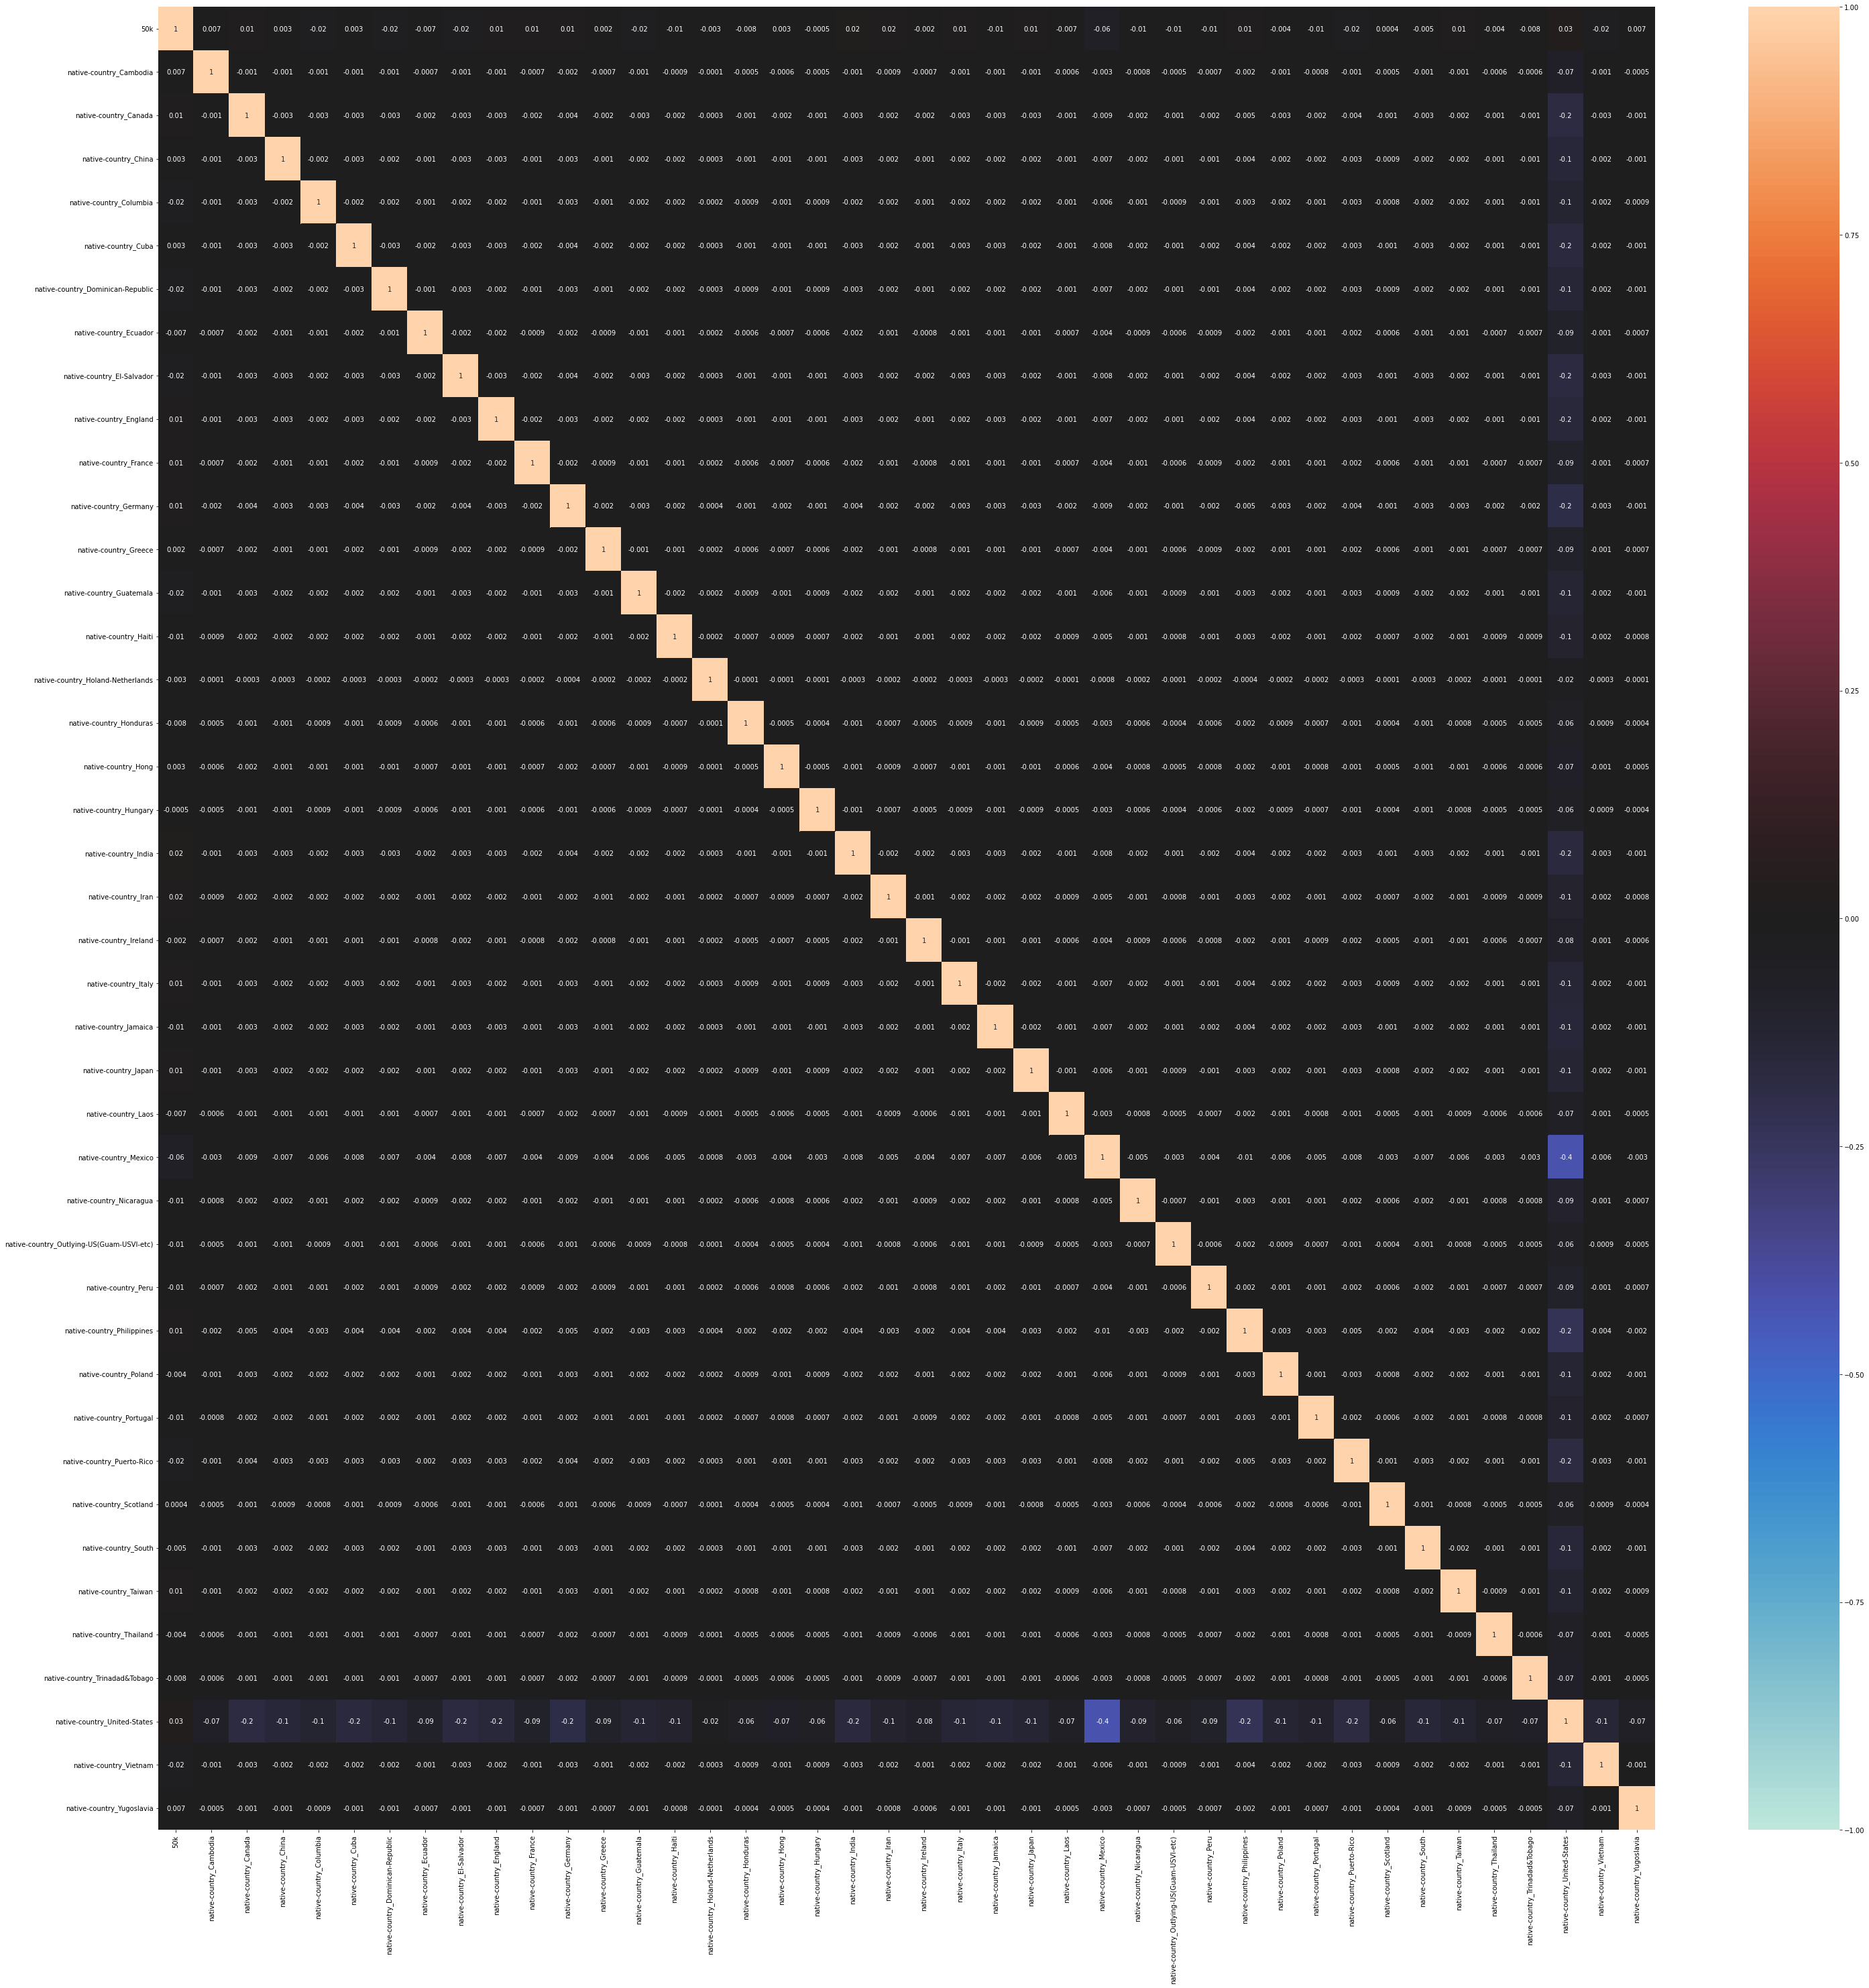

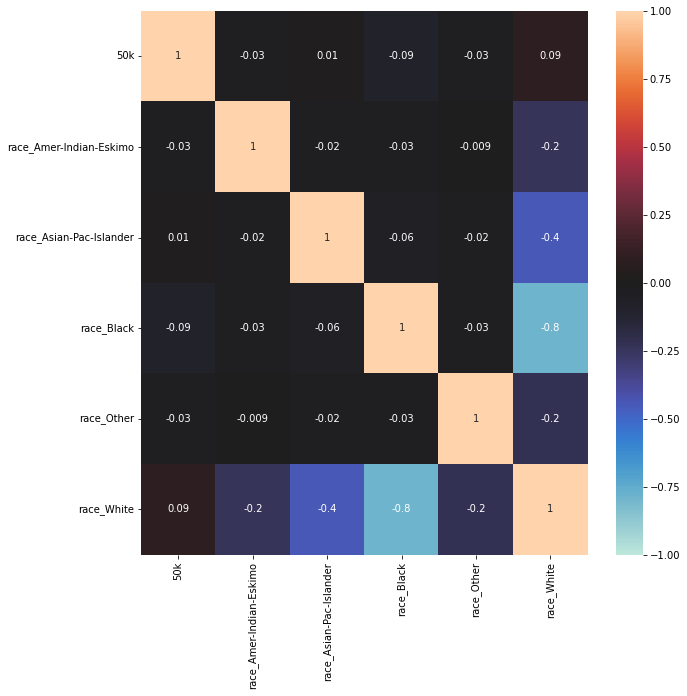

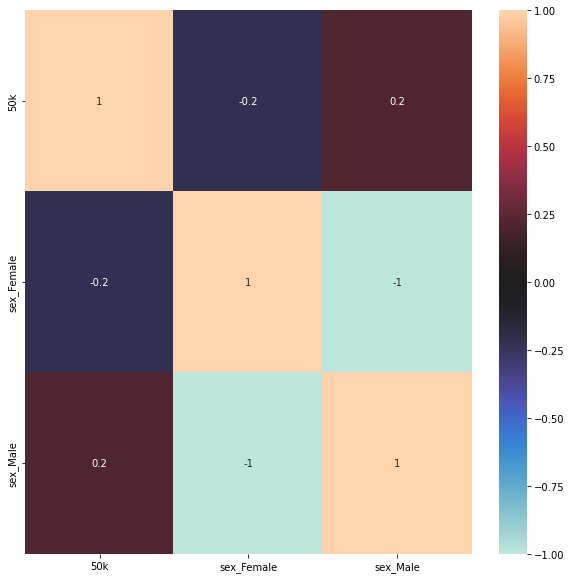

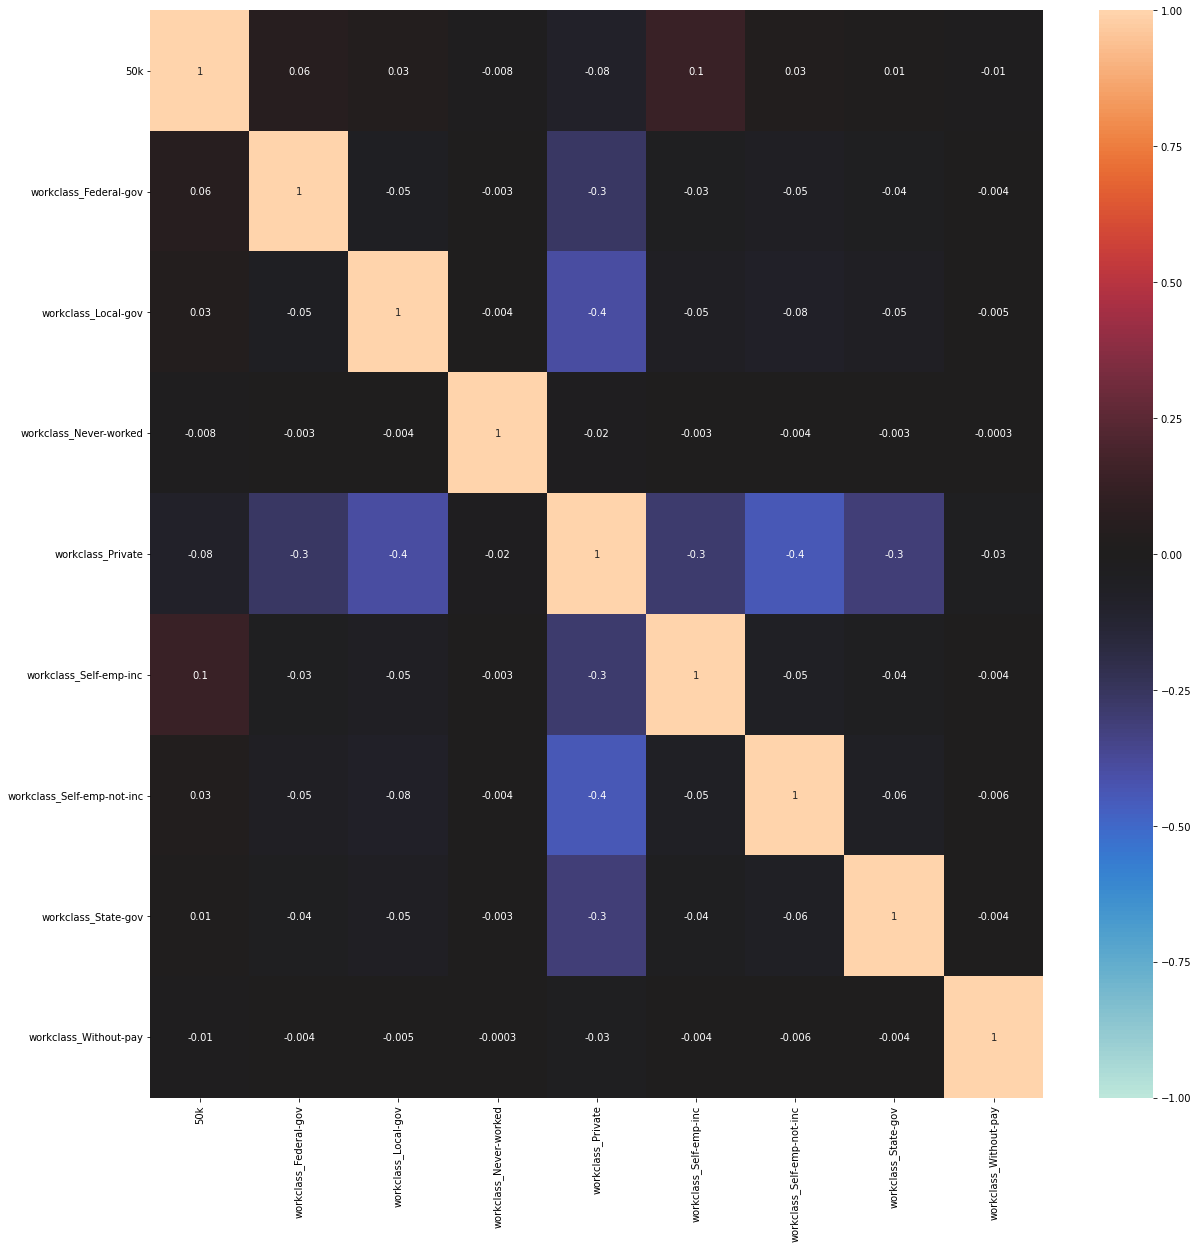

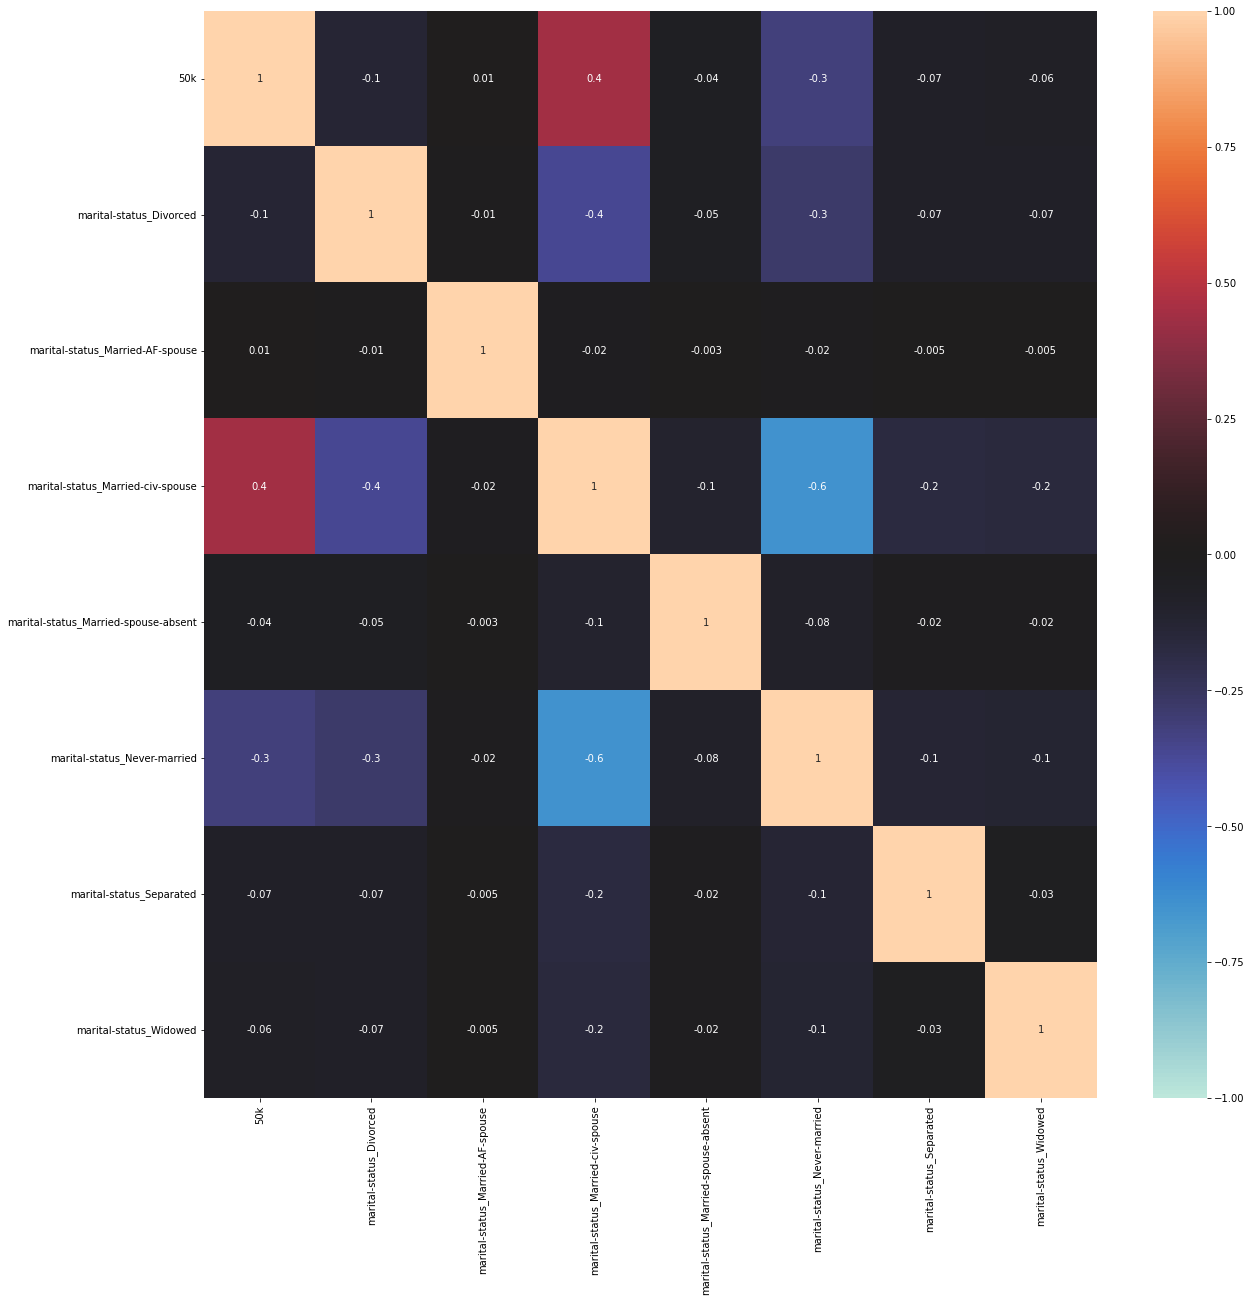

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv(file_name)
df.columns = df.columns.str.strip()
df = df.drop(columns = 'education')
df['50k'] = [ 1 if y==">50K" else 0 for y in df['50k'] ]
categ = df.select_dtypes(['object']).columns

#for col in df.columns:
 # print(col)
  #print(df[col].unique())
mergedata = pd.merge(df, pd.get_dummies(df[categ]), right_index=True, left_index=True)
dfoh = mergedata.select_dtypes(include=[np.number, 'bool'])

dfoh = dfoh.drop(columns = ["workclass_?", "occupation_?", "native-country_?"])
dfoh

#sns.heatmap(dfoh.corr(), annot = True, fmt = '.1g', vmin =-1 ,vmax=1, center=0, ax = ax)

fig, ax = plt.subplots(figsize=(20,20))
dfoh_occ = [col for col in dfoh.columns if ('50k' in col) or ('occupation' in col)]
dfoh_occ = dfoh[dfoh_occ]
print(sns.heatmap(dfoh_occ.corr(), annot = True, fmt = '.1g', vmin =-1 ,vmax=1, center=0, ax = ax))

fig, ax = plt.subplots(figsize=(50,50))
dfoh_occ = [col for col in dfoh.columns if ('50k' in col) or ('native-country' in col)]
dfoh_occ = dfoh[dfoh_occ]
print(sns.heatmap(dfoh_occ.corr(), annot = True, fmt = '.1g', vmin =-1 ,vmax=1, center=0, ax = ax))

fig, ax = plt.subplots(figsize=(10,10))
dfoh_occ = [col for col in dfoh.columns if ('50k' in col) or ('race' in col)]
dfoh_occ = dfoh[dfoh_occ]
print(sns.heatmap(dfoh_occ.corr(), annot = True, fmt = '.1g', vmin =-1 ,vmax=1, center=0, ax = ax))

fig, ax = plt.subplots(figsize=(10,10))
dfoh_occ = [col for col in dfoh.columns if ('50k' in col) or ('sex' in col)]
dfoh_occ = dfoh[dfoh_occ]
print(sns.heatmap(dfoh_occ.corr(), annot = True, fmt = '.1g', vmin =-1 ,vmax=1, center=0, ax = ax))

fig, ax = plt.subplots(figsize=(20,20))
dfoh_occ = [col for col in dfoh.columns if ('50k' in col) or ('workclass' in col)]
dfoh_occ = dfoh[dfoh_occ]
print(sns.heatmap(dfoh_occ.corr(), annot = True, fmt = '.1g', vmin =-1 ,vmax=1, center=0, ax = ax))

fig, ax = plt.subplots(figsize=(20,20))
dfoh_occ = [col for col in dfoh.columns if ('50k' in col) or ('marital-status' in col)]
dfoh_occ = dfoh[dfoh_occ]
print(sns.heatmap(dfoh_occ.corr(), annot = True, fmt = '.1g', vmin =-1 ,vmax=1, center=0, ax = ax))

One-hot encoded heatmaps for each category (on modified dataset)

AxesSubplot(0.125,0.125;0.62x0.755)
AxesSubplot(0.125,0.125;0.62x0.755)
AxesSubplot(0.125,0.125;0.62x0.755)
AxesSubplot(0.125,0.125;0.62x0.755)
AxesSubplot(0.125,0.125;0.62x0.755)
AxesSubplot(0.125,0.125;0.62x0.755)
AxesSubplot(0.125,0.125;0.62x0.755)


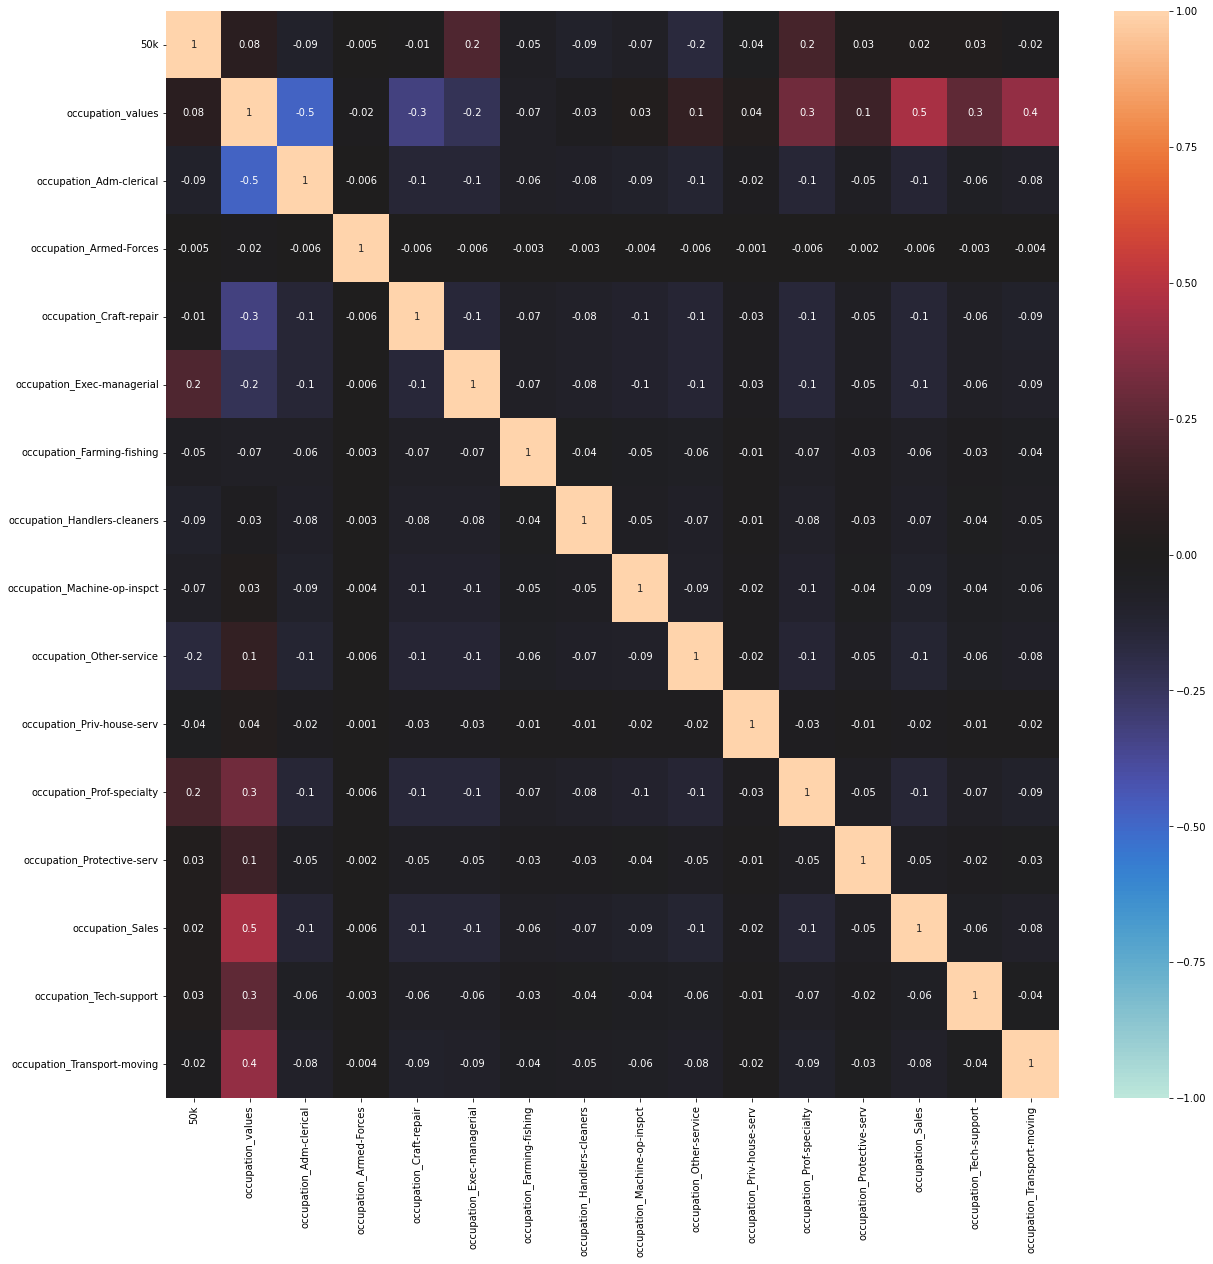

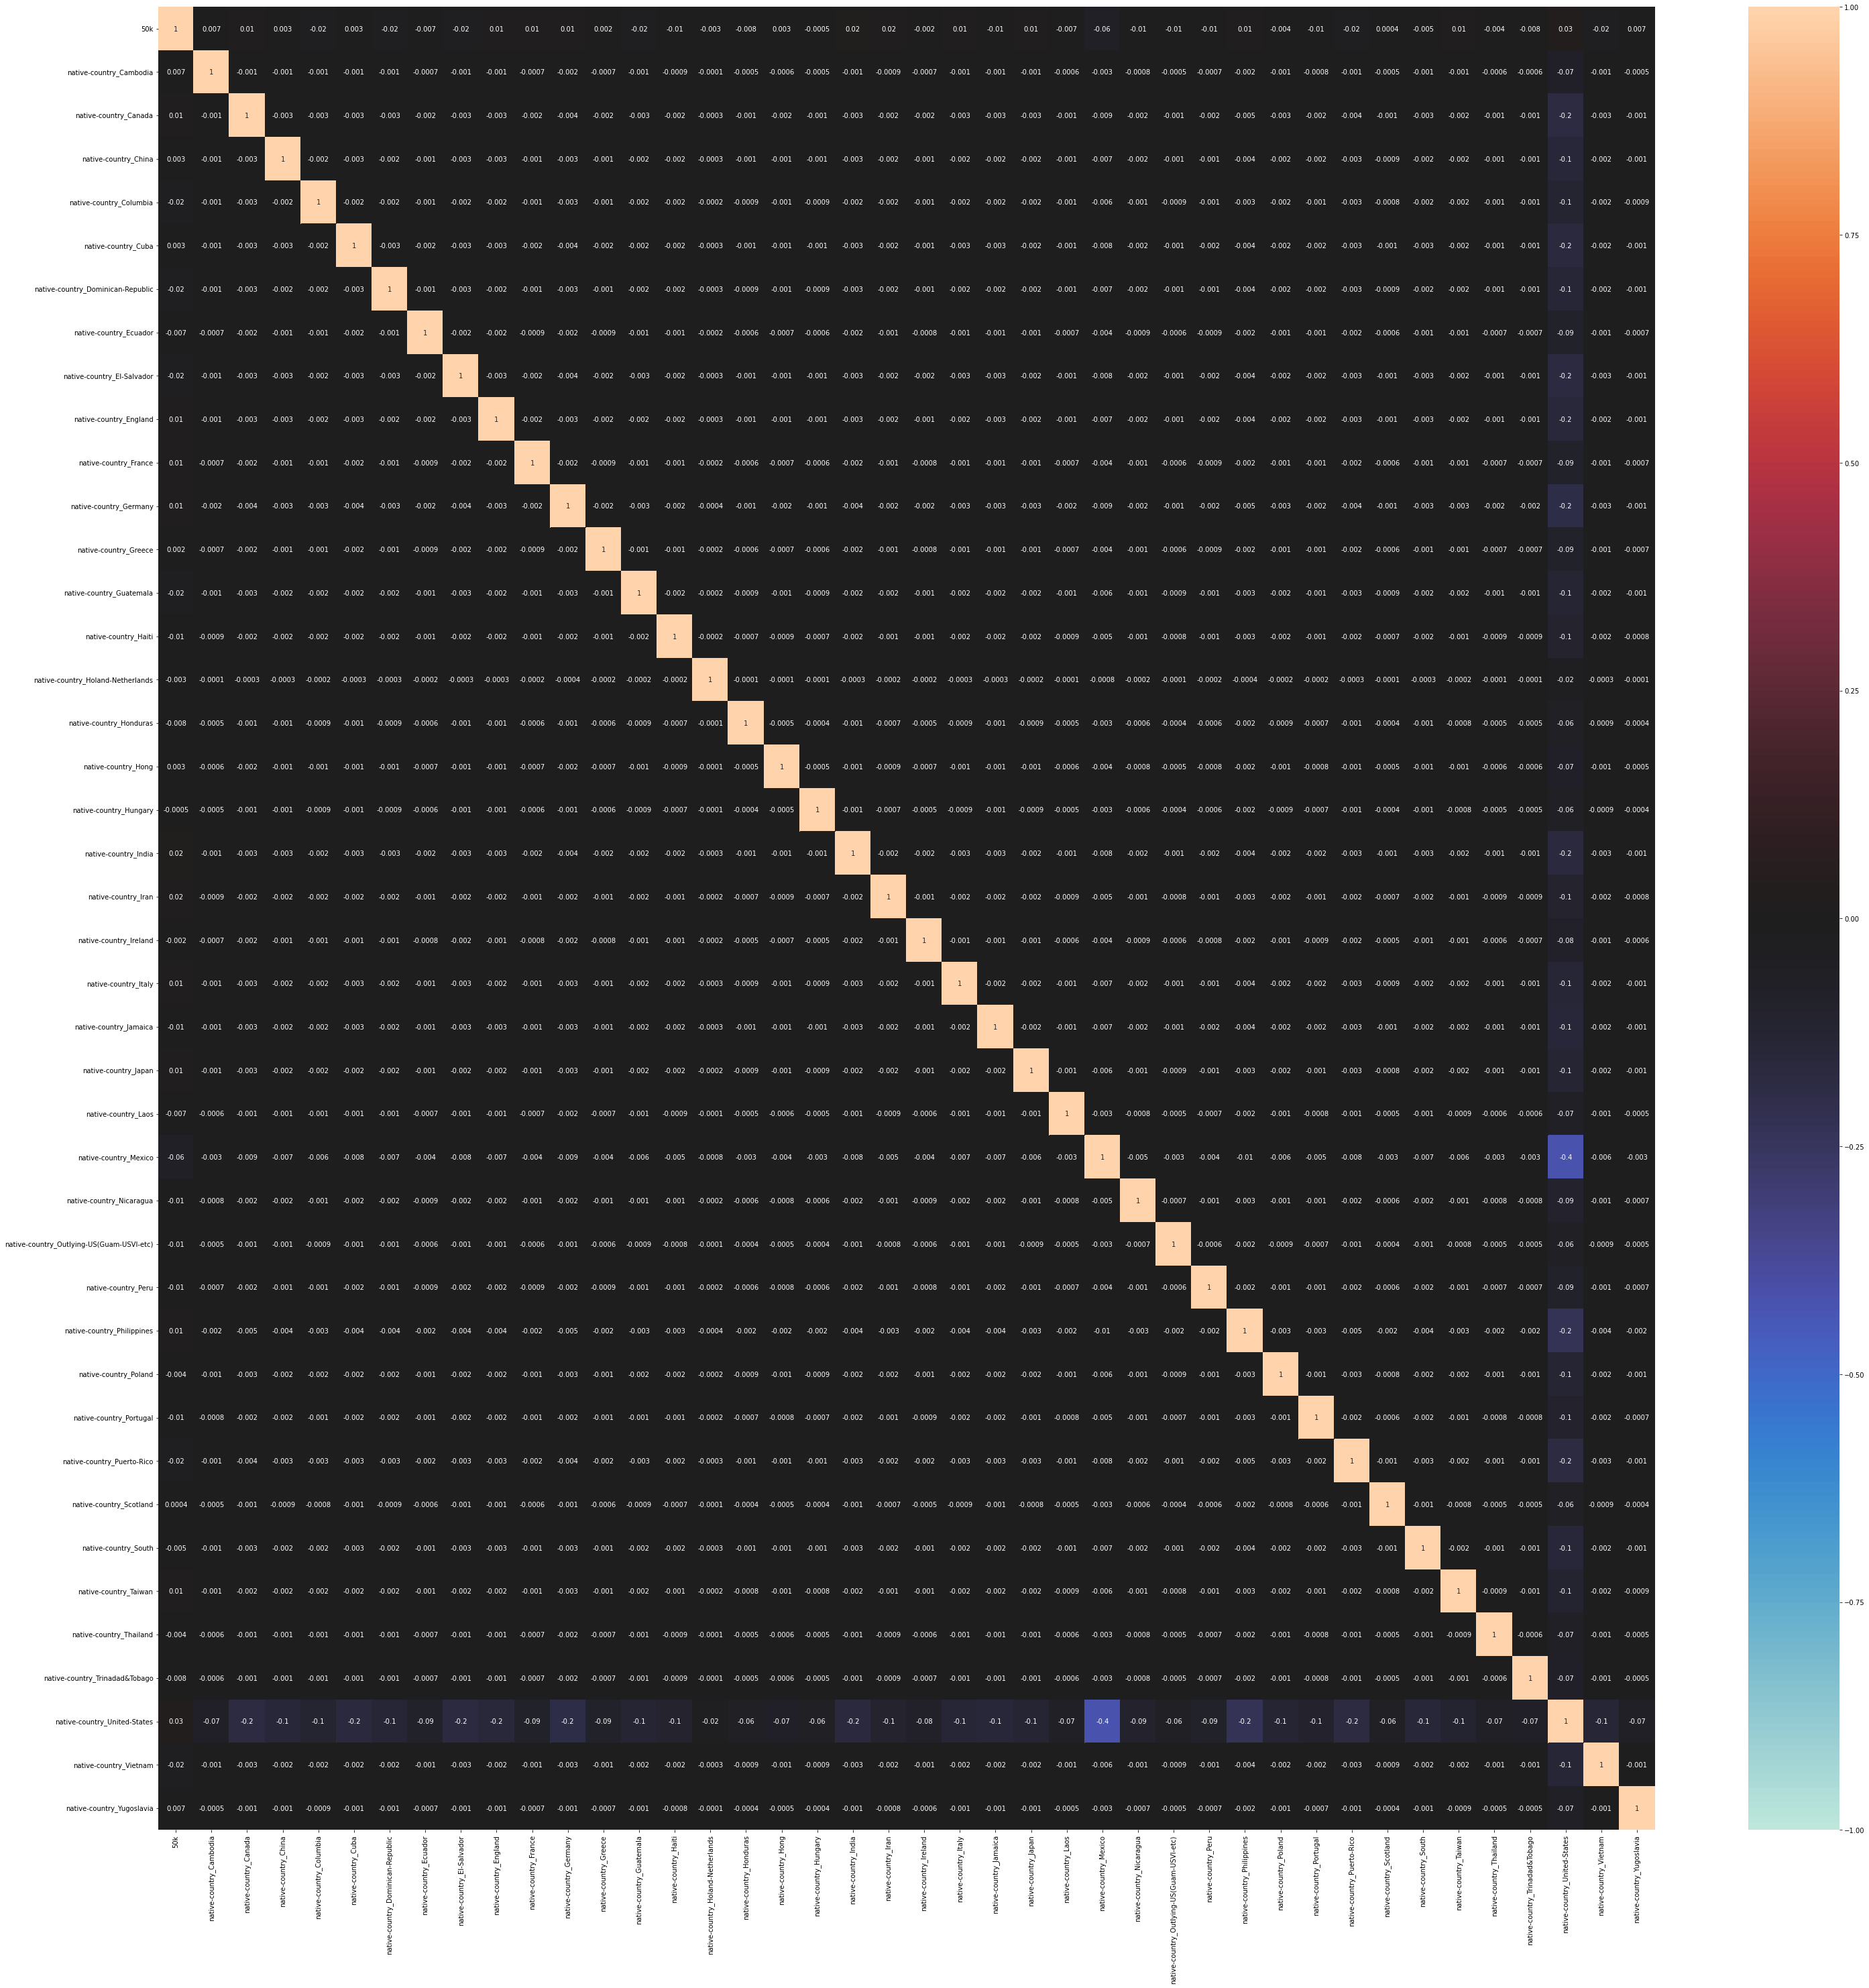

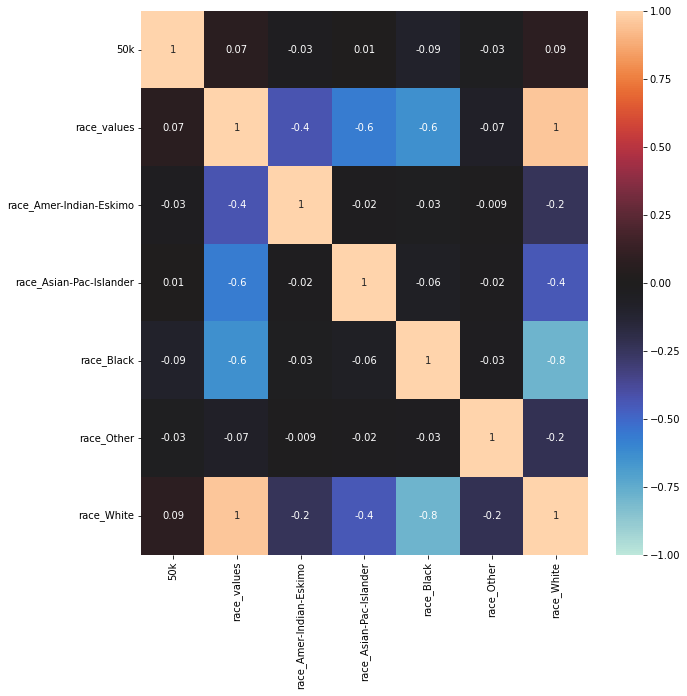

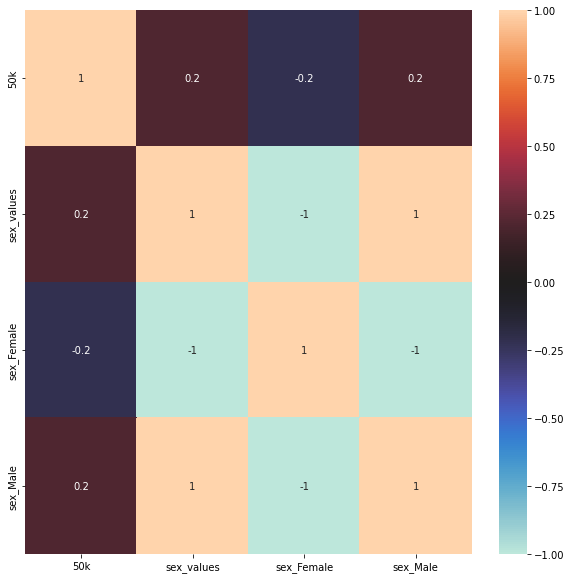

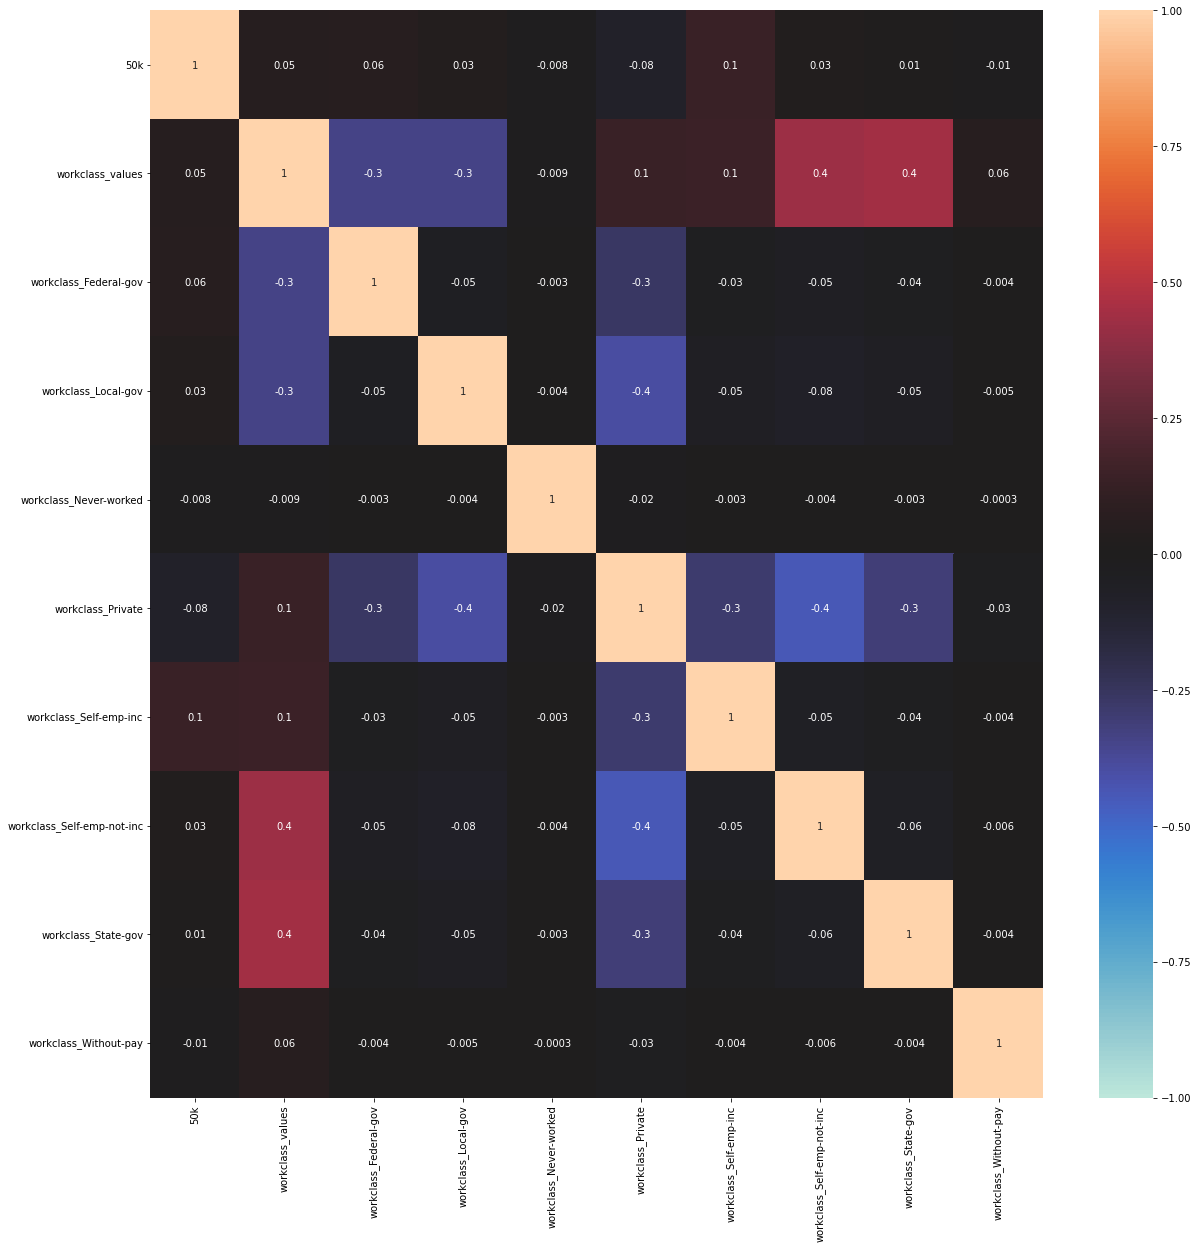

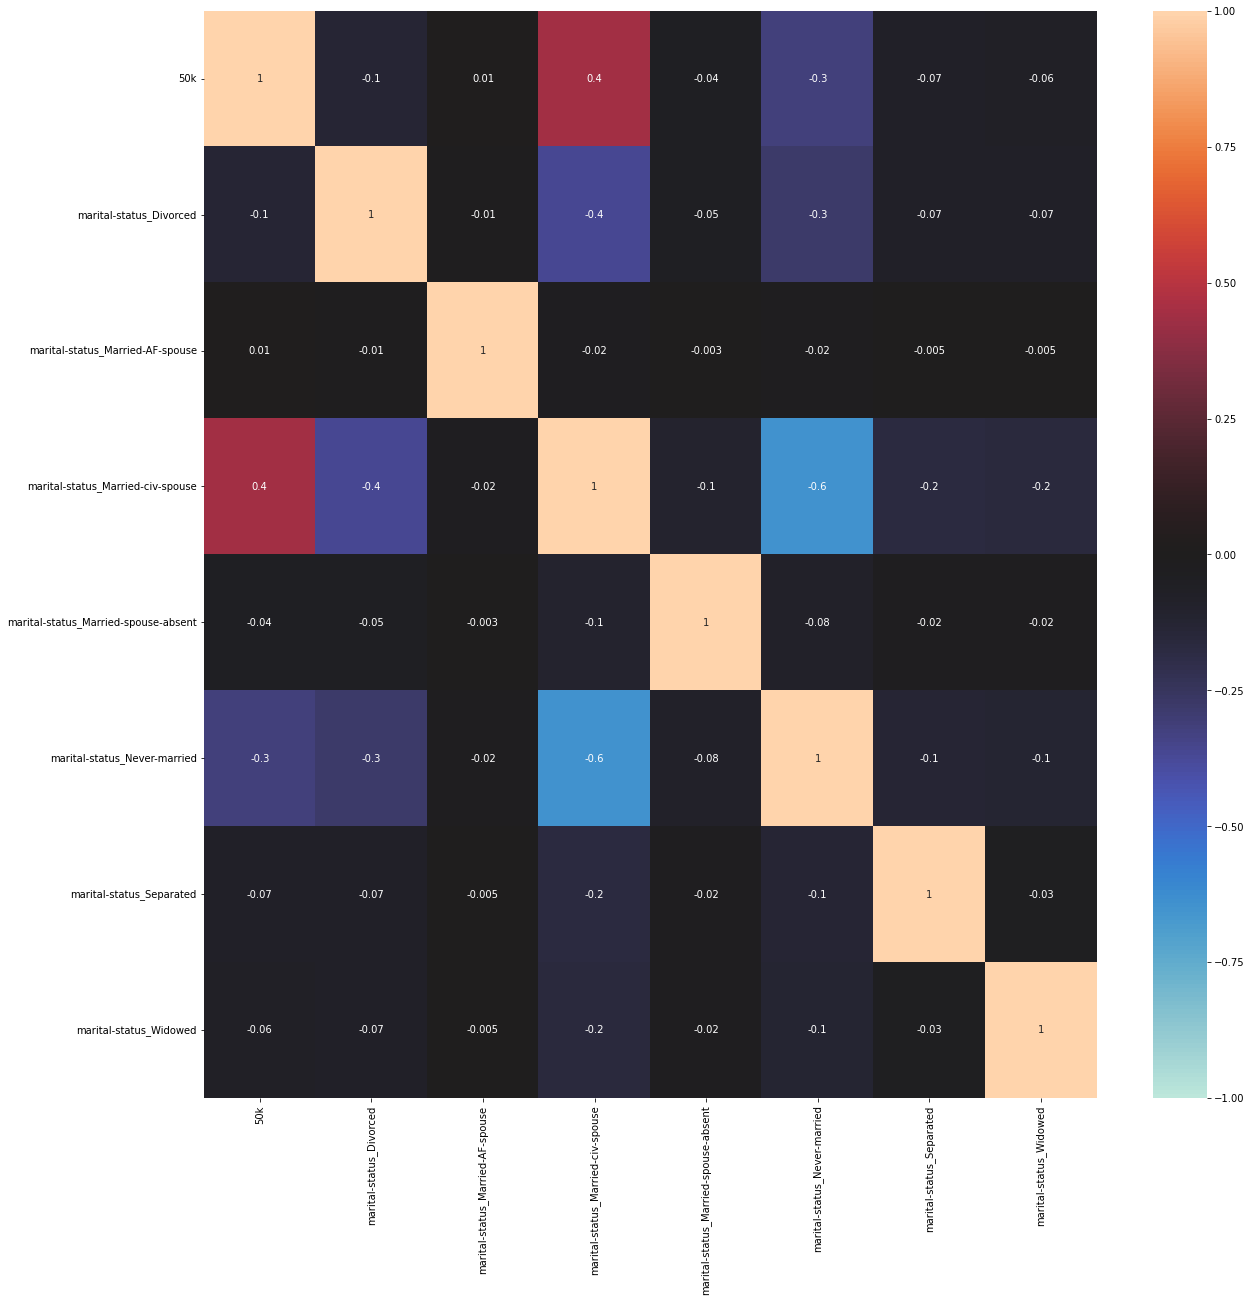

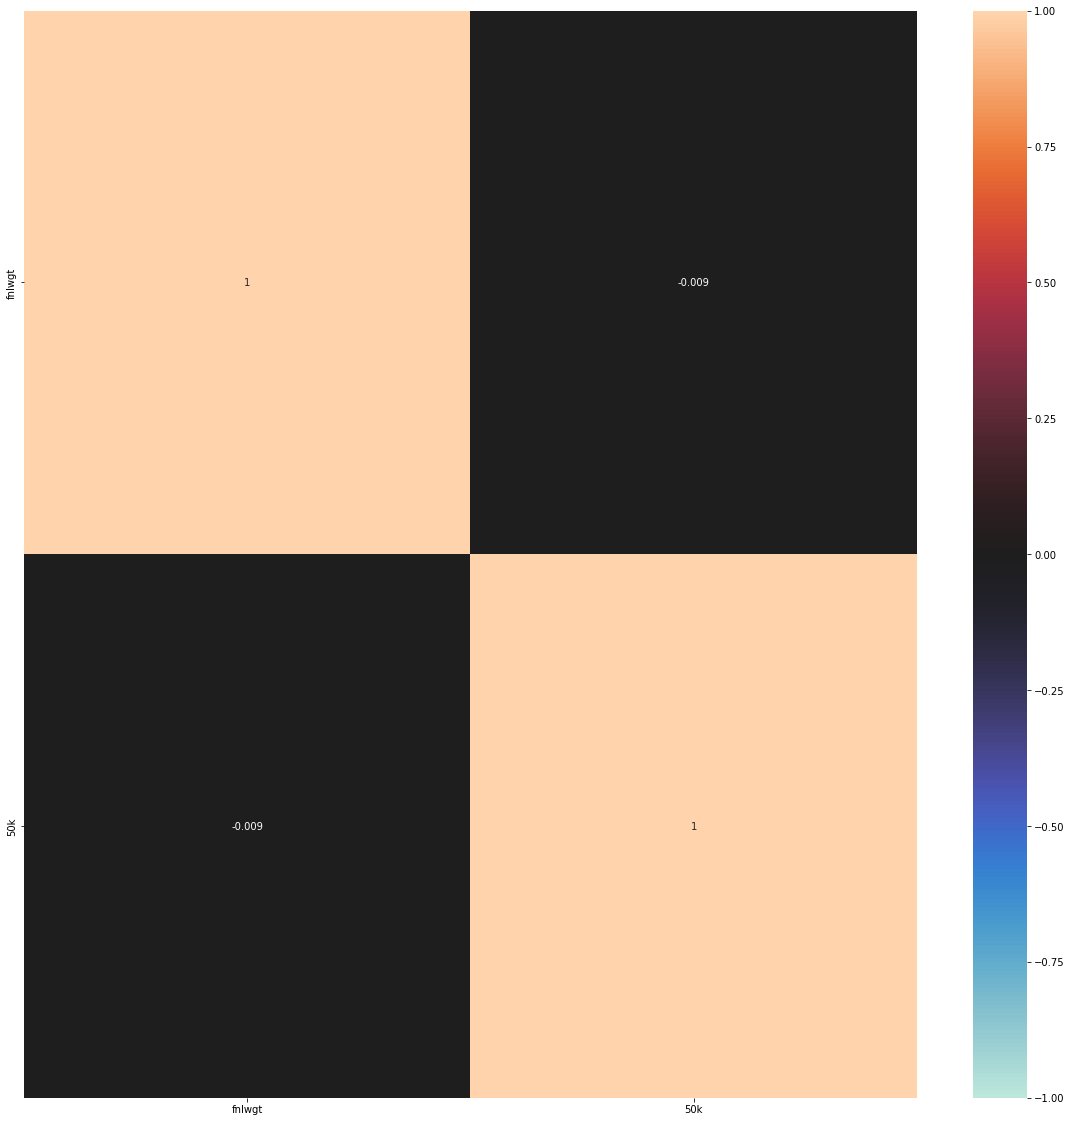

In [65]:
df = None
df2 = data
df2.columns = df2.columns.str.strip()
df2 = df2.drop(columns = 'education')
df2['50k'] = [ 1 if y==">50K" else 0 for y in df2['50k'] ]
categ = df2.select_dtypes(['object']).columns

#for col in df2.columns:
 # print(col)
  #print(df2[col].unique())
mergedata = pd.merge(df2, pd.get_dummies(df2[categ]), right_index=True, left_index=True)
df2oh = mergedata.select_dtypes(include=[np.number, 'bool'])

df2oh = df2oh.drop(columns = ["workclass_?", "occupation_?", "native-country_?"])
df2oh

#sns.heatmap(df2oh.corr(), annot = True, fmt = '.1g', vmin =-1 ,vmax=1, center=0, ax = ax)

fig, ax = plt.subplots(figsize=(20,20))
df2oh_occ = [col for col in df2oh.columns if ('50k' in col) or ('occupation' in col)]
df2oh_occ = df2oh[df2oh_occ]
print(sns.heatmap(df2oh_occ.corr(), annot = True, fmt = '.1g', vmin =-1 ,vmax=1, center=0, ax = ax))

fig, ax = plt.subplots(figsize=(50,50))
df2oh_occ = [col for col in df2oh.columns if ('50k' in col) or ('native-country' in col)]
df2oh_occ = df2oh[df2oh_occ]
print(sns.heatmap(df2oh_occ.corr(), annot = True, fmt = '.1g', vmin =-1 ,vmax=1, center=0, ax = ax))

fig, ax = plt.subplots(figsize=(10,10))
df2oh_occ = [col for col in df2oh.columns if ('50k' in col) or ('race' in col)]
df2oh_occ = df2oh[df2oh_occ]
print(sns.heatmap(df2oh_occ.corr(), annot = True, fmt = '.1g', vmin =-1 ,vmax=1, center=0, ax = ax))

fig, ax = plt.subplots(figsize=(10,10))
df2oh_occ = [col for col in df2oh.columns if ('50k' in col) or ('sex' in col)]
df2oh_occ = df2oh[df2oh_occ]
print(sns.heatmap(df2oh_occ.corr(), annot = True, fmt = '.1g', vmin =-1 ,vmax=1, center=0, ax = ax))

fig, ax = plt.subplots(figsize=(20,20))
df2oh_occ = [col for col in df2oh.columns if ('50k' in col) or ('workclass' in col)]
df2oh_occ = df2oh[df2oh_occ]
print(sns.heatmap(df2oh_occ.corr(), annot = True, fmt = '.1g', vmin =-1 ,vmax=1, center=0, ax = ax))

fig, ax = plt.subplots(figsize=(20,20))
df2oh_occ = [col for col in df2oh.columns if ('50k' in col) or ('marital-status' in col)]
df2oh_occ = df2oh[df2oh_occ]
print(sns.heatmap(df2oh_occ.corr(), annot = True, fmt = '.1g', vmin =-1 ,vmax=1, center=0, ax = ax))

fig, ax = plt.subplots(figsize=(20,20))
df2oh_occ = [col for col in df2oh.columns if ('50k' in col) or ('fnlwgt' in col)]
df2oh_occ = df2oh[df2oh_occ]
print(sns.heatmap(df2oh_occ.corr(), annot = True, fmt = '.1g', vmin =-1 ,vmax=1, center=0, ax = ax))

We can see from the heatmap plots and correlation plot above, occupation ('exec-managerial', 'other-service', 'prof-specialty'), sex, workclass (self-emp-not-inc), and marital-status have values that result in greater than 0.1 correlation to income_values/50k. For the sake of our project, we can choose to ignore the column values that result in less that 0.1 correlation in order to simplify our model.

Our final list of selected columns are as follows: 'edu_generalized', 'sex_values', 'marital_values', 'hours-per-week', 'capital-loss', 'capital-gain', 'age', 'occupation_values', and 'workclass_values'. Our final column will be our result column: 'income_values'.

In [66]:
# get specific values from categorical columns with prevalent values

# occupation 
#   (want: exec-managerial, other-service, prof-specialty)

for i in range(0,len(data['occupation'])):
  # print(data['occupation'][i])
  temp_occ = data['occupation'][i]
  if ((temp_occ != 'Exec-managerial') and (temp_occ != 'Other-service') and (temp_occ != 'Prof-specialty')):
    data['occupation'][i] = 'Other-service'

occupation_encoder = LabelEncoder()
occupation_encoder.fit(data['occupation'])
occupation_values = occupation_encoder.transform(data['occupation'])

data["occupation_values"] = occupation_values
print(data['occupation'].unique(), data['occupation_values'].unique()) # check

# workclass 
#   (want: self-emp-not-incorporated (not owned by person), other, 
#   no-job)*
#   In order to remain true to the 'other' workclass category of our customized 
#   feature, we have added an extra column for no-job/have not worked

# print(data.workclass.unique())
for i in range(0,len(data['workclass'])):
  # print(data['occupation'][i])
  temp_wc = data['workclass'][i]
  if ((temp_wc == 'Never-worked') or (temp_wc == 'Without-pay')):
    data['workclass'][i] = 'no-pay'
  elif ((temp_wc != 'Self-emp-not-inc')):
    data['workclass'][i] = 'other-job'

workclass_encoder = LabelEncoder()
workclass_encoder.fit(data['workclass'])
workclass_values = workclass_encoder.transform(data['workclass'])

data["workclass_values"] = workclass_values
print(data['workclass'].unique(), data['workclass_values'].unique()) # check


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


['Other-service' 'Exec-managerial' 'Prof-specialty'] [1 0 2]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


['other-job' 'Self-emp-not-inc' 'no-pay'] [2 0 1]


In [67]:
#  TODO: reduce data to features we want to use
data = data[['edu_generalized', 'sex_values', 'marital_values', 'hours-per-week', 'capital-loss', 'capital-gain', 'age', 'occupation_values','workclass_values', '50k']]


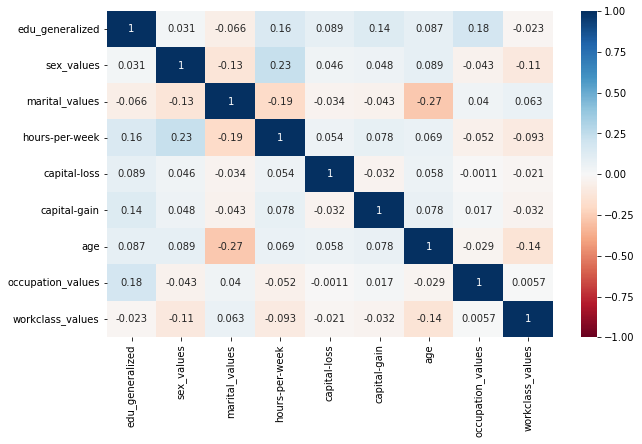

In [68]:
# Re-display correlation graphs of pre-processed data
# corr matrix of pre-processed data:
# Pearson correlation by default in pandas
corr2 = data.corr()

# Let's use Seaborn to do the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr2, vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')


In [72]:
data['50k'] = [ 1 if y==">50K" else 0 for y in data['50k'] ]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [73]:
data

,edu_generalized,sex_values,marital_values,hours-per-week,capital-loss,capital-gain,age,occupation_values,workclass_values,50k
0,1.288811,0.703071,0.921634,-0.035429,-0.21666,0.148453,0.030671,1,2,0
1,1.288811,0.703071,-0.406212,-2.222153,-0.21666,-0.145920,0.837109,0,0,0
2,-0.689293,0.703071,-1.734058,-0.035429,-0.21666,-0.145920,-0.042642,1,2,0
3,-1.183819,0.703071,-0.406212,-0.035429,-0.21666,-0.145920,1.057047,1,2,0
4,1.288811,-1.422331,-0.406212,-0.035429,-0.21666,-0.145920,-0.775768,2,2,0
...,...,...,...,...,...,...,...,...,...,...
32556,0.794285,-1.422331,-0.406212,-0.197409,-0.21666,-0.145920,-0.849080,1,2,0
32557,-0.689293,0.703071,-0.406212,-0.035429,-0.21666,-0.145920,0.103983,1,2,1
32558,-0.689293,-1.422331,2.249480,-0.035429,-0.21666,-0.145920,1.423610,1,2,0
32559,-0.689293,0.703071,0.921634,-1.655225,-0.21666,-0.145920,-1.215643,1,2,0


In [74]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

data2 = data.copy()
train, test = train_test_split(data2, test_size = 0.3, random_state = 10)
X_train = train.drop(columns = ['50k'])
X_test = test.drop(columns = ['50k'])
y_train = train['50k']
y_test = test['50k']

model = Sequential()
model.add(Dense(input_dim=9, units=7, activation='relu'))
model.add(Dense(units = 4, activation = 'tanh'))
model.add(Dense(units = 6, activation = 'selu'))
model.add(Dense(units = 5, activation = 'softplus'))
model.add(Dense(units = 1, activation = 'sigmoid'))
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')
history = model.fit(X_train, y_train, batch_size = 1, epochs = 10)
yhat_test = model.predict(X_test)

Epoch 1/10
22792/22792 [==============================] - 43s 2ms/step - loss: 0.4111
Epoch 2/10
22792/22792 [==============================] - 42s 2ms/step - loss: 0.3682
Epoch 3/10
22792/22792 [==============================] - 41s 2ms/step - loss: 0.3741
Epoch 4/10
22792/22792 [==============================] - 41s 2ms/step - loss: 0.3774
Epoch 5/10
22792/22792 [==============================] - 40s 2ms/step - loss: 0.3770
Epoch 6/10
22792/22792 [==============================] - 42s 2ms/step - loss: 0.3761
Epoch 7/10
22792/22792 [==============================] - 45s 2ms/step - loss: 0.3747
Epoch 8/10
22792/22792 [==============================] - 43s 2ms/step - loss: 0.3760
Epoch 9/10
22792/22792 [==============================] - 42s 2ms/step - loss: 0.3738
Epoch 10/10
306/306 [==============================] - 1s 2ms/step


In [75]:
yhat_test = [1 if y> 0.5 else 0 for y in yhat_test]
print(classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      7423
           1       0.77      0.42      0.54      2346

    accuracy                           0.83      9769
   macro avg       0.80      0.69      0.72      9769
weighted avg       0.82      0.83      0.81      9769



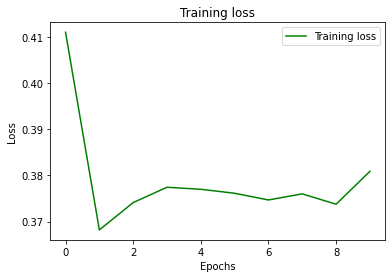

In [76]:
loss_train = history.history['loss']
# loss_val = history.history['val_loss']
epochs = range(0,10)
plt.plot(epochs, loss_train, 'g', label='Training loss')
# plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()